#Import Libraries

In [ ]:
# !pip install imbalanced-learn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Read Data
import pandas as pd

#Statistic for t-Test and Chi-Square
from scipy import stats
from scipy.stats import chi2_contingency

#Extension
import numpy as np

# Data Resampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

#Datavisualization
import matplotlib.pyplot as plt
import seaborn as sns

#Feature Encoding
from sklearn.preprocessing import LabelEncoder

#Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Split Data
from sklearn.model_selection import train_test_split

#Modeling
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    log_loss
)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Read Data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Portfolio by Colab/Insurance/Fraud Detection/Insurance Dataset.csv')
data

,Age,EmploymentStatus,CreditScore,PolicyType,PremiumAmount,PolicyDuration,TimeSincePolicyInception,ClaimType,ClaimAmount,NumberOfPastClaims,Fraudulent
0,62,Retired,454,Auto,848.65,10,48,Theft,19122.590000,4,0
1,65,Employed,843,Health,1005.40,5,313,Illness,14812.860000,0,0
2,82,Unemployed,446,Auto,443.81,8,128,Other,16249.892387,2,0
3,85,Retired,379,Home,870.50,12,51,Natural Disaster,6741.752253,4,0
4,85,Unemployed,763,Health,284.88,29,252,Accident,90184.391870,5,1
...,...,...,...,...,...,...,...,...,...,...,...
99995,52,Employed,450,Auto,1990.20,11,4,Illness,1684.014346,0,0
99996,83,Unemployed,609,Auto,309.91,19,14,Accident,12562.686723,0,0
99997,89,Self-employed,522,Life,549.71,14,228,Illness,9444.790000,0,0
99998,86,Unemployed,615,Health,1477.97,24,48,Other,11392.224530,0,0


#Data Exploration

##General Exploration

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  int64  
 1   EmploymentStatus          100000 non-null  object 
 2   CreditScore               100000 non-null  int64  
 3   PolicyType                100000 non-null  object 
 4   PremiumAmount             100000 non-null  float64
 5   PolicyDuration            100000 non-null  int64  
 6   TimeSincePolicyInception  100000 non-null  int64  
 7   ClaimType                 100000 non-null  object 
 8   ClaimAmount               100000 non-null  float64
 9   NumberOfPastClaims        100000 non-null  int64  
 10  Fraudulent                100000 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 8.4+ MB


In [ ]:
data.describe()

,Age,CreditScore,PremiumAmount,PolicyDuration,TimeSincePolicyInception,ClaimAmount,NumberOfPastClaims,Fraudulent
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,58.58684,575.005060,1052.425951,15.002130,181.820950,12582.661754,2.063870,0.049540
std,23.63799,158.867676,547.935608,8.351058,105.340756,13844.031949,1.451755,0.216994
min,18.00000,300.000000,100.070000,1.000000,0.000000,500.073421,0.000000,0.000000
25%,38.00000,437.000000,579.042500,8.000000,91.000000,5592.937965,1.000000,0.000000
50%,59.00000,576.000000,1051.540000,15.000000,182.000000,10696.694909,2.000000,0.000000
75%,79.00000,713.000000,1526.135000,22.000000,273.000000,15783.016162,3.000000,0.000000
max,99.00000,849.000000,1999.990000,29.000000,364.000000,147008.927343,6.000000,1.000000


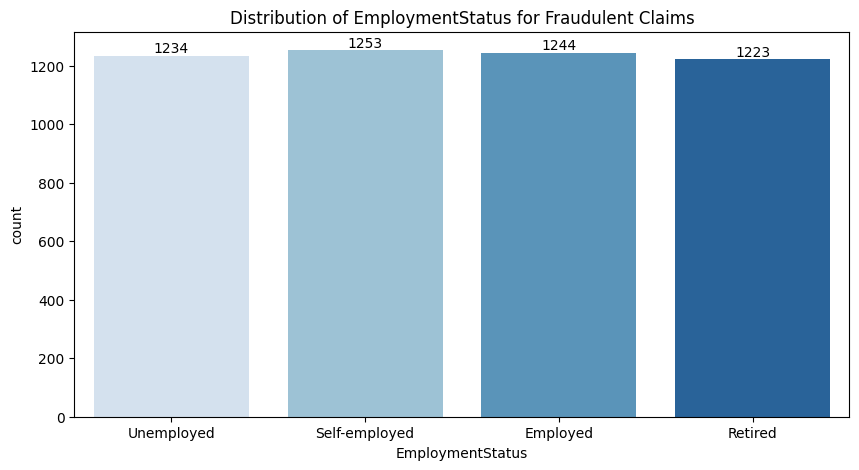

In [ ]:
# Assuming the dataset with the 'Fraudulent' column is available as 'data'
# We will first filter out the fraudulent cases
fraudulent_data = data[data['Fraudulent'] == 1]

# Distribution of EmploymentStatus for fraudulent cases
plt.figure(figsize=(10, 5))
employment_status_plot = sns.countplot(x='EmploymentStatus', data=fraudulent_data, palette="Blues")
employment_status_plot.set_title('Distribution of EmploymentStatus for Fraudulent Claims')
for p in employment_status_plot.patches:
    employment_status_plot.annotate(format(p.get_height(), '.0f'),
                                    (p.get_x() + p.get_width() / 2., p.get_height()),
                                    ha = 'center', va = 'center',
                                    xytext = (0, 5),
                                    textcoords = 'offset points')
plt.show()

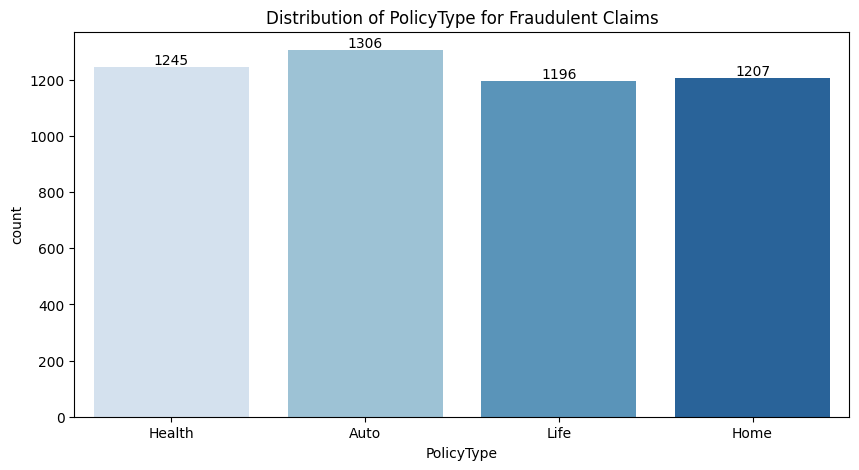

In [ ]:
# Distribution of PolicyType for fraudulent cases
plt.figure(figsize=(10, 5))
policy_type_plot = sns.countplot(x='PolicyType', data=fraudulent_data, palette="Blues")
policy_type_plot.set_title('Distribution of PolicyType for Fraudulent Claims')
for p in policy_type_plot.patches:
    policy_type_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha = 'center', va = 'center',
                              xytext = (0, 5),
                              textcoords = 'offset points')
plt.show()


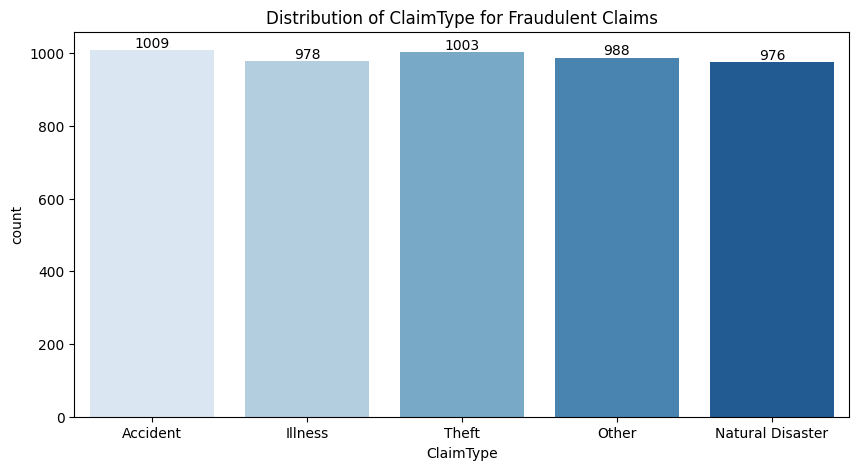

In [ ]:
# Distribution of ClaimType for fraudulent cases
plt.figure(figsize=(10, 5))
claim_type_plot = sns.countplot(x='ClaimType', data=fraudulent_data, palette="Blues")
claim_type_plot.set_title('Distribution of ClaimType for Fraudulent Claims')
for p in claim_type_plot.patches:
    claim_type_plot.annotate(format(p.get_height(), '.0f'),
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha = 'center', va = 'center',
                             xytext = (0, 5),
                             textcoords = 'offset points')
plt.show()

##BoxPlot

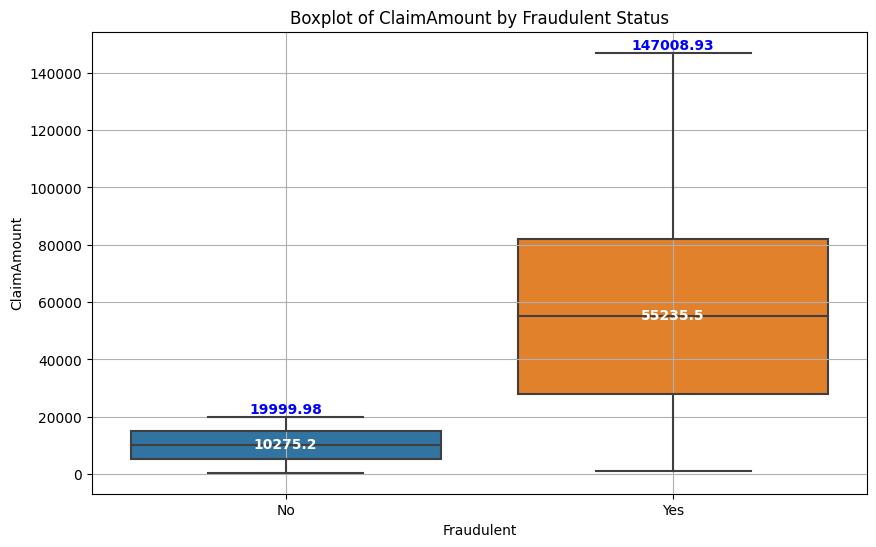

In [ ]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fraudulent', y='ClaimAmount', data=data)

# Set titles and labels
plt.title('Boxplot of ClaimAmount by Fraudulent Status')
plt.xlabel('Fraudulent')
plt.ylabel('ClaimAmount')

# Change labels from 0 and 1 to 'No' and 'Yes'
plt.xticks([0, 1], ['No', 'Yes'])

# Function to calculate the upper whisker value
def calculate_upper_whisker(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    upper_whisker = q3 + 1.5 * iqr
    return min(max(data), upper_whisker)

# Adding values on the box plot
# Iterate over each box to add values
for i in range(len(data['Fraudulent'].unique())):
    subset = data[data['Fraudulent'] == i]
    median = subset['ClaimAmount'].median().round(2)
    upper_whisker = round(calculate_upper_whisker(subset['ClaimAmount']), 2)

    plt.text(i, median, f'{median}', ha='center', va='center', fontweight='bold', color='white')
    plt.text(i, upper_whisker, f'{upper_whisker}', ha='center', va='bottom', fontweight='bold', color='blue')

# Show the plot
plt.grid()
plt.show()

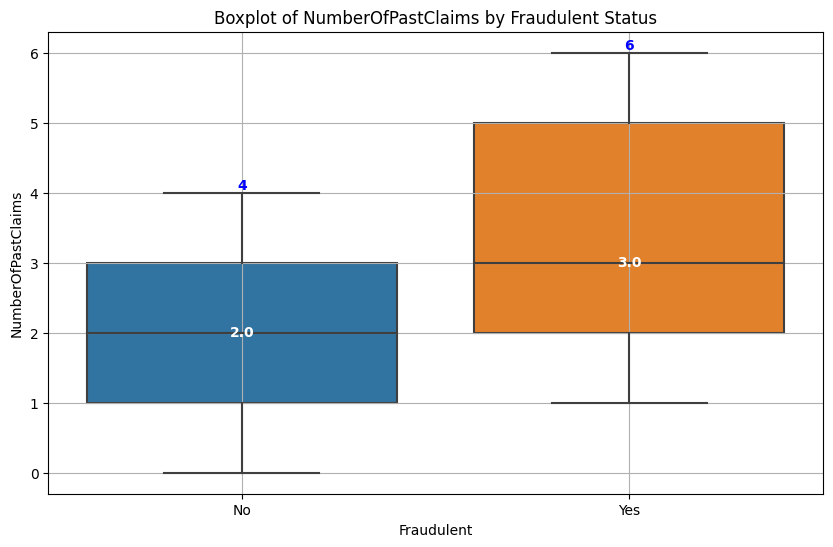

In [ ]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fraudulent', y='NumberOfPastClaims', data=data)

# Set titles and labels
plt.title('Boxplot of NumberOfPastClaims by Fraudulent Status')
plt.xlabel('Fraudulent')
plt.ylabel('NumberOfPastClaims')

# Change labels from 0 and 1 to 'No' and 'Yes'
plt.xticks([0, 1], ['No', 'Yes'])

# Function to calculate the upper whisker value
def calculate_upper_whisker(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    upper_whisker = q3 + 1.5 * iqr
    return min(max(data), upper_whisker)

# Adding values on the box plot
# Iterate over each box to add values
for i in range(len(data['Fraudulent'].unique())):
    subset = data[data['Fraudulent'] == i]
    median = subset['NumberOfPastClaims'].median().round(2)
    upper_whisker = round(calculate_upper_whisker(subset['NumberOfPastClaims']), 2)

    plt.text(i, median, f'{median}', ha='center', va='center', fontweight='bold', color='white')
    plt.text(i, upper_whisker, f'{upper_whisker}', ha='center', va='bottom', fontweight='bold', color='blue')

# Show the plot
plt.grid()
plt.show()

##Correlation between x numerical variables

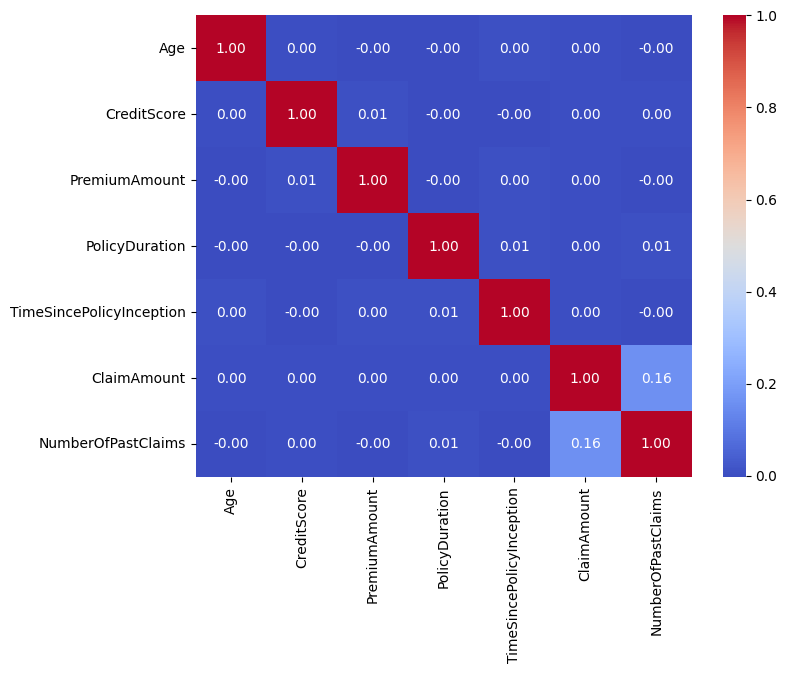

In [ ]:
# Using Pearson correlation
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Age', 'CreditScore', 'PremiumAmount', 'PolicyDuration', 'TimeSincePolicyInception', 'ClaimAmount', 'NumberOfPastClaims']].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

##Hypothesis Testing
Multivariate t-Test

In [ ]:
# Split the DataFrame into two groups based on 'Fraudulent' status
group1 = data[data['Fraudulent'] == 0]  # Non-Fraudulent
group2 = data[data['Fraudulent'] == 1]  # Fraudulent

# Perform independent t-tests for each feature
features = ['Age', 'CreditScore', 'PremiumAmount', 'PolicyDuration', 'TimeSincePolicyInception', 'ClaimAmount', 'NumberOfPastClaims']  # Add other features here
p_values = []

for feature in features:
    t_stat, p_val = stats.ttest_ind(group1[feature], group2[feature], equal_var=False)
    p_values.append((feature, t_stat, p_val))

# Applying Bonferroni correction
alpha = 0.05 / len(features)
significant_features = [f for f, t, p in p_values if p < alpha]

print("Feature, t-statistic, p-value:")
for feature, t_stat, p_val in p_values:
    print(f"{feature}: t={t_stat:.2f}, p={p_val:.4f}")

print("\nSignificant features after Bonferroni correction:", significant_features)


Feature, t-statistic, p-value:
Age: t=0.01, p=0.9959
CreditScore: t=-1.09, p=0.2779
PremiumAmount: t=-1.50, p=0.1345
PolicyDuration: t=-1.07, p=0.2852
TimeSincePolicyInception: t=-0.07, p=0.9406
ClaimAmount: t=-95.40, p=0.0000
NumberOfPastClaims: t=-69.28, p=0.0000

Significant features after Bonferroni correction: ['ClaimAmount', 'NumberOfPastClaims']


###Chi-Square

In [ ]:
# Conducting a Chi-Square test
# Typically, Chi-Square tests are used for categorical variables.
# Here, we'll test the association between 'EmploymentStatus' and 'Fraudulent'
# Creating a contingency table
contingency_table = pd.crosstab(data['EmploymentStatus'], data['Fraudulent'])

# Performing the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Displaying the results
print("Chi-Square Test")
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-Square Test
Chi-square statistic: 0.5573653708879931
P-value: 0.9061193596319524
Degrees of freedom: 3
Expected frequencies:
 [[23562.85386  1228.14614]
 [23799.5184   1240.4816 ]
 [23890.76256  1245.23744]
 [23792.86518  1240.13482]]


In [ ]:
# Conducting a Chi-Square test
# Typically, Chi-Square tests are used for categorical variables.
# Here, we'll test the association between 'PolicyType' and 'Fraudulent'
# Creating a contingency table
contingency_table = pd.crosstab(data['PolicyType'], data['Fraudulent'])

# Performing the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Displaying the results
print("Chi-Square Test")
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-Square Test
Chi-square statistic: 3.8712983506452447
P-value: 0.2757011475134814
Degrees of freedom: 3
Expected frequencies:
 [[24101.76468  1256.23532]
 [23653.14756  1232.85244]
 [23664.55308  1233.44692]
 [23626.53468  1231.46532]]


In [ ]:
# Conducting a Chi-Square test
# Typically, Chi-Square tests are used for categorical variables.
# Here, we'll test the association between 'ClaimType' and 'Fraudulent'
# Creating a contingency table
contingency_table = pd.crosstab(data['ClaimType'], data['Fraudulent'])

# Performing the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Displaying the results
print("Chi-Square Test")
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-Square Test
Chi-square statistic: 1.3060971623837059
P-value: 0.8603402116032637
Degrees of freedom: 4
Expected frequencies:
 [[18920.80722   986.19278]
 [19239.21132  1002.78868]
 [18855.22548   982.77452]
 [18925.55952   986.44048]
 [19105.19646   995.80354]]


#Data Slicing for Analysis

##Claim Amount > 20 are Fraud
Data from BoxPlot

In [ ]:
data[(data['ClaimAmount'] > 20000)]['Fraudulent'].count()

4065

In [ ]:
data[(data['ClaimAmount'] > 20000) & (data['Fraudulent'] == 1)]['Fraudulent'].count()

4065

In [ ]:
data[(data['ClaimAmount'] > 20000) & (data['Fraudulent'] == 1)].sum()

Age                                                                    238215
EmploymentStatus            UnemployedUnemployedSelf-employedEmployedRetir...
CreditScore                                                           2351808
PolicyType                  HealthAutoHealthHealthLifeAutoHealthAutoHealth...
PremiumAmount                                                       4324796.9
PolicyDuration                                                          61296
TimeSincePolicyInception                                               738870
ClaimType                   AccidentIllnessAccidentTheftIllnessOtherIllnes...
ClaimAmount                                                  272619279.805342
NumberOfPastClaims                                                      14053
Fraudulent                                                               4065
dtype: object

In [ ]:
data[(data['ClaimAmount'] <= 20000) & (data['NumberOfPastClaims'] > 4) & (data['Fraudulent'] == 1)].sum()

Age                                                                     16878
EmploymentStatus            UnemployedUnemployedUnemployedUnemployedRetire...
CreditScore                                                            166715
PolicyType                  HealthLifeHealthHomeHomeLifeHomeAutoHomeHealth...
PremiumAmount                                                       307506.64
PolicyDuration                                                           4490
TimeSincePolicyInception                                                50228
ClaimType                   AccidentNatural DisasterTheftOtherOtherAcciden...
ClaimAmount                                                    3000748.571594
NumberOfPastClaims                                                       1520
Fraudulent                                                                285
dtype: object

In [ ]:
data[data['Fraudulent'] == 1].sum()

Age                                                                    290231
EmploymentStatus            UnemployedUnemployedSelf-employedEmployedRetir...
CreditScore                                                           2860391
PolicyType                  HealthAutoHealthHealthLifeAutoHealthAutoHealth...
PremiumAmount                                                      5270386.18
PolicyDuration                                                          74931
TimeSincePolicyInception                                               901277
ClaimType                   AccidentIllnessAccidentTheftIllnessOtherIllnes...
ClaimAmount                                                  282253304.553042
NumberOfPastClaims                                                      17226
Fraudulent                                                               4954
dtype: object

In [ ]:
# Filter the DataFrame for claims above 20,000 THB and flagged as fraudulent
data_over20_fraud = data[(data['ClaimAmount'] > 20000) & (data['Fraudulent'] == 1)]

# Calculate the total amount of these claims
total_savings = data_over20_fraud['ClaimAmount'].sum()

print(f"Total transactions where claim amount is over 20K is {data[data['ClaimAmount'] > 20000]['Fraudulent'].count()} cases.")
print(f"Total transactions where claim amount is over 20K and fraud is {data[(data['ClaimAmount'] > 20000) & (data['Fraudulent'] == 1)]['Fraudulent'].count()} cases.")
print(f"Once the company treats claim amounts above 20,000 THB as fraud, it could save up to {total_savings} THB")

Total transactions where claim amount is over 20K is 4065 cases.
Total transactions where claim amount is over 20K and fraud is 4065 cases.
Once the company treats claim amounts above 20,000 THB as fraud, it could save up to 272619279.8053417 THB


##Claim Amount <= 20 and Number of Claim > 4 are Fraud
Data from BoxPlot

In [ ]:
data[(data['ClaimAmount'] <= 20000) & (data['NumberOfPastClaims'] > 4)]['Fraudulent'].count()

285

In [ ]:
data[(data['ClaimAmount'] <= 20000) & (data['NumberOfPastClaims'] > 4) & (data['Fraudulent'] == 1)]['Fraudulent'].count()

285

In [ ]:
# Filter the DataFrame for claims above 20,000 THB and flagged as fraudulent
data_under20andNoClaimOver4_fraud = data[(data['ClaimAmount'] <= 20000) & (data['NumberOfPastClaims'] > 4) & (data['Fraudulent'] == 1)]

# Calculate the total amount of these claims
total_savings = data_under20andNoClaimOver4_fraud['ClaimAmount'].sum()

print(f"Total transactions where claim amount is under 20K and No.Claim is over 4 times is {data[(data['ClaimAmount'] <= 20000) & (data['NumberOfPastClaims'] > 4)]['Fraudulent'].count()} cases.")
print(f"Total transactions where claim amount is under 20K and No.Claim is over 4 times and fraud is {data[(data['ClaimAmount'] <= 20000) & (data['NumberOfPastClaims'] > 4) & (data['Fraudulent'] == 1)]['Fraudulent'].count()} cases.")
print(f"Once the company treats claim amounts above 20,000 THB as fraud, it could save up to {total_savings} THB")

Total transactions where claim amount is under 20K and No.Claim is over 4 times is 285 cases.
Total transactions where claim amount is under 20K and No.Claim is over 4 times and fraud is 285 cases.
Once the company treats claim amounts above 20,000 THB as fraud, it could save up to 3000748.571593521 THB


##Data Slicing

In [ ]:
data_for_analysis = data[(data['ClaimAmount'] <= 20000) & (data['NumberOfPastClaims'] <= 4)]
data_for_analysis

,Age,EmploymentStatus,CreditScore,PolicyType,PremiumAmount,PolicyDuration,TimeSincePolicyInception,ClaimType,ClaimAmount,NumberOfPastClaims,Fraudulent
0,62,Retired,454,Auto,848.65,10,48,Theft,19122.590000,4,0
1,65,Employed,843,Health,1005.40,5,313,Illness,14812.860000,0,0
2,82,Unemployed,446,Auto,443.81,8,128,Other,16249.892387,2,0
3,85,Retired,379,Home,870.50,12,51,Natural Disaster,6741.752253,4,0
5,27,Self-employed,682,Health,1805.10,15,352,Illness,6947.410000,2,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,52,Employed,450,Auto,1990.20,11,4,Illness,1684.014346,0,0
99996,83,Unemployed,609,Auto,309.91,19,14,Accident,12562.686723,0,0
99997,89,Self-employed,522,Life,549.71,14,228,Illness,9444.790000,0,0
99998,86,Unemployed,615,Health,1477.97,24,48,Other,11392.224530,0,0


In [ ]:
data_for_analysis[data_for_analysis['Fraudulent'] == 1].describe()

,Age,CreditScore,PremiumAmount,PolicyDuration,TimeSincePolicyInception,ClaimAmount,NumberOfPastClaims,Fraudulent
count,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.0
mean,58.175497,566.006623,1056.428212,15.140728,185.726821,10982.245325,2.736755,1.0
std,23.663527,161.301115,559.159720,8.561846,101.683458,5508.278646,1.018196,0.0
min,18.000000,300.000000,101.700000,1.000000,0.000000,1094.548190,1.000000,1.0
25%,37.000000,420.000000,534.495000,7.000000,97.000000,6399.545178,2.000000,1.0
50%,60.000000,561.500000,1072.035000,15.000000,190.000000,10806.761283,3.000000,1.0
75%,79.000000,705.500000,1546.882500,22.000000,271.000000,16009.790791,4.000000,1.0
max,99.000000,849.000000,1998.640000,29.000000,364.000000,19998.916712,4.000000,1.0


In [ ]:
data_for_analysis[data_for_analysis['Fraudulent'] == 0]['PremiumAmount'].mean()

1051.8297339183134

In [ ]:
#TruePositive
data_for_analysis[data_for_analysis['Fraudulent'] == 1]['ClaimAmount'].mean()

10982.245324680276

In [ ]:
#TrueNegative
data_for_analysis['PremiumAmount'].mean()

1051.8587718766335

In [ ]:
#FalsePositive
data_for_analysis[data_for_analysis['Fraudulent'] == 0]['PremiumAmount'].mean()/2

525.9148669591567

##Imbalance
Only for target variable (y)

There is imbalance on target variable (Fraudulent)

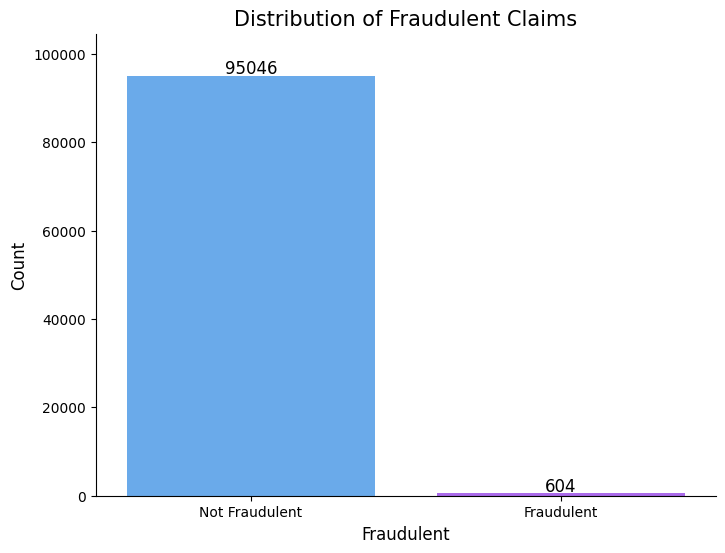

In [ ]:
# Creating a beautiful bar plot for the 'Fraudulent' feature
plt.figure(figsize=(8, 6))
fraud_bar_plot = sns.countplot(x='Fraudulent', data=data_for_analysis, palette='cool')

# Adding data labels
for p in fraud_bar_plot.patches:
    fraud_bar_plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                            textcoords='offset points')

# Set plot title and labels
plt.title('Distribution of Fraudulent Claims', fontsize=15)
plt.xlabel('Fraudulent', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Not Fraudulent', 'Fraudulent'])  # Set custom labels for the x-axis categories
plt.ylim(0, max(data_for_analysis['Fraudulent'].value_counts()) * 1.1)  # Set y-axis limit higher to make space for labels

# Removing the top and right spines
sns.despine(top=True, right=True)

plt.show()

##Under Sampling

In [ ]:
data.columns

Index(['Age', 'EmploymentStatus', 'CreditScore', 'PolicyType', 'PremiumAmount',
       'PolicyDuration', 'TimeSincePolicyInception', 'ClaimType',
       'ClaimAmount', 'NumberOfPastClaims', 'Fraudulent'],
      dtype='object')

In [ ]:
# Define the undersampling method
under_sampler = RandomUnderSampler(random_state=42)

# Resample the dataset
X_resampled, y_resampled = under_sampler.fit_resample(data_for_analysis[['EmploymentStatus', 'PolicyType', 'ClaimType', 'ClaimAmount', 'NumberOfPastClaims']],
                                                                                  data_for_analysis['Fraudulent'])

In [ ]:
X_resampled

,EmploymentStatus,PolicyType,ClaimType,ClaimAmount,NumberOfPastClaims
0,Employed,Health,Natural Disaster,7425.650000,1
1,Retired,Health,Accident,10773.220778,4
2,Employed,Life,Other,4284.867092,4
3,Unemployed,Life,Accident,19870.494361,0
4,Unemployed,Home,Other,14431.928808,0
...,...,...,...,...,...
1203,Employed,Home,Other,14170.598624,4
1204,Retired,Life,Other,12910.722962,1
1205,Retired,Life,Accident,10130.045618,3
1206,Retired,Home,Natural Disaster,10506.796525,2


In [ ]:
y_resampled

0       0
1       0
2       0
3       0
4       0
       ..
1203    1
1204    1
1205    1
1206    1
1207    1
Name: Fraudulent, Length: 1208, dtype: int64

In [ ]:
#Get them back to DataFrame
X_resampled['Fraudulent'] = y_resampled

Undersampling_data = X_resampled
Undersampling_data

,EmploymentStatus,PolicyType,ClaimType,ClaimAmount,NumberOfPastClaims,Fraudulent
0,Employed,Health,Natural Disaster,7425.650000,1,0
1,Retired,Health,Accident,10773.220778,4,0
2,Employed,Life,Other,4284.867092,4,0
3,Unemployed,Life,Accident,19870.494361,0,0
4,Unemployed,Home,Other,14431.928808,0,0
...,...,...,...,...,...,...
1203,Employed,Home,Other,14170.598624,4,1
1204,Retired,Life,Other,12910.722962,1,1
1205,Retired,Life,Accident,10130.045618,3,1
1206,Retired,Home,Natural Disaster,10506.796525,2,1


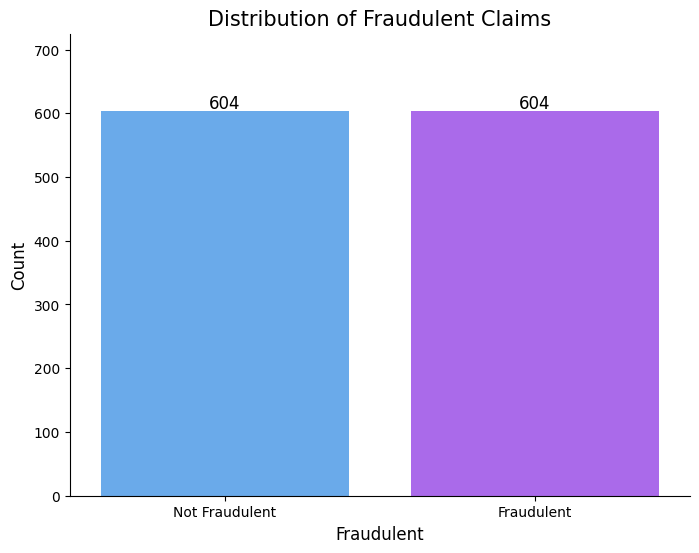

In [ ]:
# Creating a beautiful bar plot for the 'Fraudulent' feature
plt.figure(figsize=(8, 6))
fraud_bar_plot = sns.countplot(x='Fraudulent', data=Undersampling_data, palette='cool')

# Adding data labels
for p in fraud_bar_plot.patches:
    fraud_bar_plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                            textcoords='offset points')

# Set plot title and labels
plt.title('Distribution of Fraudulent Claims', fontsize=15)
plt.xlabel('Fraudulent', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Not Fraudulent', 'Fraudulent'])  # Set custom labels for the x-axis categories
plt.ylim(0, max(Undersampling_data['Fraudulent'].value_counts()) * 1.2)  # Set y-axis limit higher to make space for labels

# Removing the top and right spines
sns.despine(top=True, right=True)

plt.show()

## Features Correlation

###Pearson Correlation

In [ ]:
Undersampling_data.corr()

<ipython-input-35-bdadd3a462c5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Undersampling_data.corr()


,ClaimAmount,NumberOfPastClaims,Fraudulent
ClaimAmount,1.000000,0.023861,0.077884
NumberOfPastClaims,0.023861,1.000000,0.259882
Fraudulent,0.077884,0.259882,1.000000


<ipython-input-36-910efaa823a7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Undersampling_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")


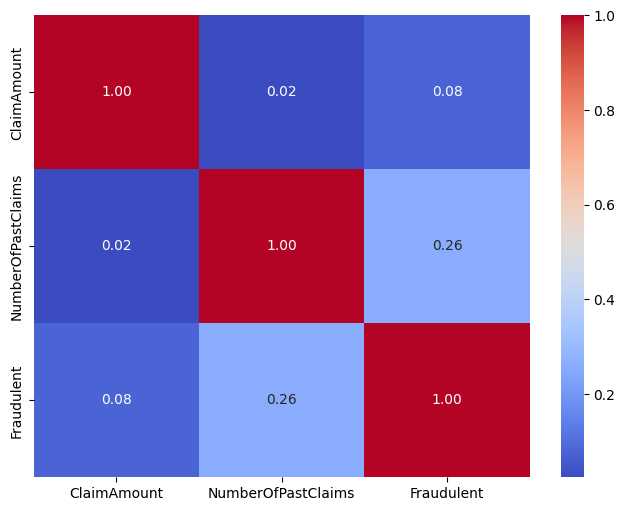

In [ ]:
# Using Pearson correlation
plt.figure(figsize=(8, 6))
sns.heatmap(Undersampling_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

#Data Preparation

##Feature Encoding
Because there are more than 2 variables in each feature

In [ ]:
# Create a copy of the dataframe to avoid altering the original data
data_encoded = Undersampling_data.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# List of categorical columns to be encoded
categorical_columns = ['EmploymentStatus', 'PolicyType', 'ClaimType']

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    data_encoded[column] = le.fit_transform(data_encoded[column])

# Show the first few rows of the dataframe to verify encoding
data_encoded.head(20)

,EmploymentStatus,PolicyType,ClaimType,ClaimAmount,NumberOfPastClaims,Fraudulent
0,0,1,2,7425.650000,1,0
1,1,1,0,10773.220778,4,0
2,0,3,3,4284.867092,4,0
3,3,3,0,19870.494361,0,0
4,3,2,3,14431.928808,0,0
5,3,3,1,10600.060000,4,0
6,3,0,3,12413.280000,4,0
7,3,3,4,8985.095361,4,0
8,1,2,4,16305.661272,2,0
9,2,2,4,1639.680149,1,0


In [ ]:
# #Check Data
# data_encoded[(data_encoded['Age'] == 53) & (data_encoded['CreditScore'] == 421)]

## Feature Scaling

###Standardizaion

In [ ]:
# Create a copy to avoid changing the original data
data_standardized = data_encoded.copy()

# Initialize the StandardScaler
scaler = StandardScaler()

# List of numerical columns to be standardized
numerical_columns = ['ClaimAmount', 'NumberOfPastClaims']

# Apply StandardScaler to each numerical column
data_standardized[numerical_columns] = scaler.fit_transform(data_standardized[numerical_columns])

# Show the first few rows of the dataframe to verify standardization
data_standardized.head(20)

,EmploymentStatus,PolicyType,ClaimType,ClaimAmount,NumberOfPastClaims,Fraudulent
0,0,1,2,-0.566770,-1.060293,0
1,1,1,0,0.039997,1.220124,0
2,0,3,3,-1.136056,1.220124,0
3,3,3,0,1.688932,-1.820432,0
4,3,2,3,0.703160,-1.820432,0
5,3,3,1,0.008611,1.220124,0
6,3,0,3,0.337268,1.220124,0
7,3,3,4,-0.284111,1.220124,0
8,1,2,4,1.042785,-0.300154,0
9,2,2,4,-1.615511,-1.060293,0


###Normalization

In [ ]:
# Create a copy to avoid changing the original data
data_normalized = data_encoded.copy()

# Initialize the StandardScaler
min_max_scaler = MinMaxScaler()

# List of numerical columns to be standardized
numerical_columns = ['ClaimAmount', 'NumberOfPastClaims']

# Apply StandardScaler to each numerical column
data_normalized[numerical_columns] = min_max_scaler.fit_transform(data_normalized[numerical_columns])

# Show the first few rows of the dataframe to verify standardization
data_normalized.head(20)

,EmploymentStatus,PolicyType,ClaimType,ClaimAmount,NumberOfPastClaims,Fraudulent
0,0,1,2,0.354905,0.25,0
1,1,1,0,0.526658,1.00,0
2,0,3,3,0.193761,1.00,0
3,3,3,0,0.993411,0.00,0
4,3,2,3,0.714375,0.00,0
5,3,3,1,0.517774,1.00,0
6,3,0,3,0.610805,1.00,0
7,3,3,4,0.434915,1.00,0
8,1,2,4,0.810511,0.50,0
9,2,2,4,0.058045,0.25,0


#Split Data

##Train-Test Split

###Standardization

In [ ]:
# Define the features (X) and the target (y)
Standardized_X = data_standardized.drop('Fraudulent', axis=1)
Standardized_y = data_standardized['Fraudulent']

# Perform the train-test split
Standardized_X_train, Standardized_X_test, Standardized_y_train, Standardized_y_test = train_test_split(Standardized_X, Standardized_y, test_size=0.2, random_state=42)

# Output the shape of the resulting splits
Standardized_X_train.shape, Standardized_X_test.shape, Standardized_y_train.shape, Standardized_y_test.shape

((966, 5), (242, 5), (966,), (242,))

In [ ]:
Standardized_X_train

,EmploymentStatus,PolicyType,ClaimType,ClaimAmount,NumberOfPastClaims
788,1,1,4,1.454019,-0.300154
665,0,2,4,-0.295937,-0.300154
296,0,2,1,-0.064018,-1.820432
567,2,2,0,1.137921,-1.820432
679,2,0,2,-0.865971,0.459985
...,...,...,...,...,...
1044,0,2,4,1.599791,0.459985
1095,1,3,3,-0.588435,-0.300154
1130,1,2,4,0.907654,-0.300154
860,2,0,4,0.859634,0.459985


###Normalization

In [ ]:
# Define the features (X) and the target (y)
Normalized_X = data_normalized.drop('Fraudulent', axis=1)
Normalized_y = data_normalized['Fraudulent']

# Perform the train-test split
Normalized_X_train, Normalized_X_test, Normalized_y_train, Normalized_y_test = train_test_split(Normalized_X, Normalized_y, test_size=0.2, random_state=42)

# Output the shape of the resulting splits
Normalized_X_train.shape, Normalized_X_test.shape, Normalized_y_train.shape, Normalized_y_test.shape

((966, 5), (242, 5), (966,), (242,))

In [ ]:
Normalized_X_train

,EmploymentStatus,PolicyType,ClaimType,ClaimAmount,NumberOfPastClaims
788,1,1,4,0.926916,0.50
665,0,2,4,0.431567,0.50
296,0,2,1,0.497215,0.00
567,2,2,0,0.837440,0.00
679,2,0,2,0.270212,0.75
...,...,...,...,...,...
1044,0,2,4,0.968178,0.75
1095,1,3,3,0.348772,0.50
1130,1,2,4,0.772260,0.50
860,2,0,4,0.758667,0.75


#10 Folds Cross Validation

##Random Forest Algorithm

###Standardization

In [ ]:
# Initialize the model again
RF_Model_Standardization = RandomForestClassifier(random_state=42)

# Perform 10-fold cross-validation
RF_Standardization_cv_scores = cross_val_score(RF_Model_Standardization, Standardized_X_train, Standardized_y_train, cv=10)

# Output the cross-validation scores
RF_Standardization_cv_scores

array([0.67010309, 0.53608247, 0.68041237, 0.59793814, 0.6185567 ,
       0.64948454, 0.60416667, 0.52083333, 0.59375   , 0.71875   ])

###Normalization

In [ ]:
# Initialize the model again
RF_Model_Normalization = RandomForestClassifier(random_state=42)

# Perform 10-fold cross-validation
RF_Normalization_cv_scores = cross_val_score(RF_Model_Normalization, Normalized_X_train, Normalized_y_train, cv=10)

# Output the cross-validation scores
RF_Normalization_cv_scores

array([0.67010309, 0.53608247, 0.68041237, 0.59793814, 0.6185567 ,
       0.64948454, 0.60416667, 0.53125   , 0.59375   , 0.71875   ])

#Modeling

##Random Forest Algorithm

###Standardization

In [ ]:
# # Define the parameter grid
# param_grid = {
#                       'n_estimators': [100, 200, 300], # The number of trees in the forest.
#                       'max_depth': [10, 20, None], # The maximum depth of the tree.
#                       'min_samples_split': [2, 5, 10], # The minimum number of samples required to split an internal node.
#                       'min_samples_leaf': [1, 2, 4], # The minimum number of samples required to be at a leaf node.
#                       'max_features': ['sqrt', 'log2', None] # The number of features to consider when looking for the best split.
#                       }
# # Initialize the Random Forest Classifier
# RF_classifier_Standardization = RandomForestClassifier(random_state=42)

# # Initialize GridSearchCV
# Standardized_grid_search = GridSearchCV(
#                                                               estimator=RF_classifier_Standardization,
#                                                               param_grid=param_grid,
#                                                               cv=5, # Number of folds in cross-validation
#                                                               n_jobs=-1, # Use all available cores
#                                                               verbose=2
#                                                             )

# # Train the classifier on the training data
# Standardized_grid_search.fit(Standardized_X_train, Standardized_y_train)

# #Get the cross-validation results dictionary
# cv_results = Standardized_grid_search.cv_results_

# # Access the mean test score for each hyperparameter combination
# mean_scores = cv_results['mean_test_score']

# # Access the standard deviation of the test score
# std_scores = cv_results['std_test_score']

# # Get individual fold scores
# fold_scores = [cv_results[f'split{i}_test_score'] for i in range(Standardized_grid_search.cv)]

# # Calculate the min and max scores across all folds for each parameter combination
# min_scores = mean_scores - std_scores
# max_scores = mean_scores + std_scores

# # Get the best parameters
# best_params = Standardized_grid_search.best_params_

# # Print the details
# print(f"Best parameters: {Standardized_grid_search.best_params_}")
# print(f"Best score: {Standardized_grid_search.best_score_}")
# print("Mean cross-validation scores: ", np.mean(mean_scores))
# print("Standard deviation of scores: ", np.mean(std_scores))
# print("Min scores: ", np.min(min_scores))
# print("Max scores: ", np.max(max_scores))

In [ ]:
#Best Parameter From GridSearch Above
RF_Standardized_Best_Parameters = {'max_depth': 10,
                                                        'max_features': 'sqrt',
                                                        'min_samples_leaf': 4,
                                                        'min_samples_split': 2,
                                                        'n_estimators': 200}

# Initialize the Random Forest Classifier
RF_classifier_Standardization = RandomForestClassifier(**RF_Standardized_Best_Parameters, random_state=42)

# Train the classifier on the training data
RF_classifier_Standardization.fit(Standardized_X_train, Standardized_y_train)

# Get predicted probabilities for the test set
Predictions = RF_classifier_Standardization.predict_proba(Standardized_X_test)

# The probabilities are in the format [probability_class_0, probability_class_1]
# We are typically interested in the probability of class 1 (e.g., fraud)
fraud_predictions = Predictions[:, 1]

# Output the probabilities
fraud_predictions

array([0.57965045, 0.50340597, 0.49525817, 0.51075481, 0.52715262,
       0.01131944, 0.69731303, 0.01021825, 0.71563911, 0.47976184,
       0.68563195, 0.01306577, 0.57477477, 0.03490817, 0.57174773,
       0.01346795, 0.64526373, 0.71676926, 0.00630357, 0.50430986,
       0.01942125, 0.56536058, 0.63485345, 0.50696352, 0.4960443 ,
       0.63364732, 0.63274211, 0.70109361, 0.48697505, 0.54609989,
       0.53351674, 0.71637368, 0.32288281, 0.70514778, 0.651841  ,
       0.69834018, 0.54463876, 0.0278936 , 0.62398326, 0.56272182,
       0.46220633, 0.50660607, 0.50032745, 0.60915251, 0.63134874,
       0.52615818, 0.50934104, 0.47772381, 0.02584043, 0.51477221,
       0.57869674, 0.50991024, 0.61732413, 0.61866988, 0.72474613,
       0.51464346, 0.6459877 , 0.46162753, 0.60090565, 0.48227734,
       0.48399429, 0.49883165, 0.50474679, 0.47923657, 0.49042389,
       0.67846607, 0.62009303, 0.57463313, 0.57670864, 0.02835646,
       0.56924883, 0.60904848, 0.7305939 , 0.57548888, 0.65916

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5330578512396694
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[129   0]
 [113   0]]
ROC AUC: 0.6515743980242849
Log Loss: 0.6142118286685689


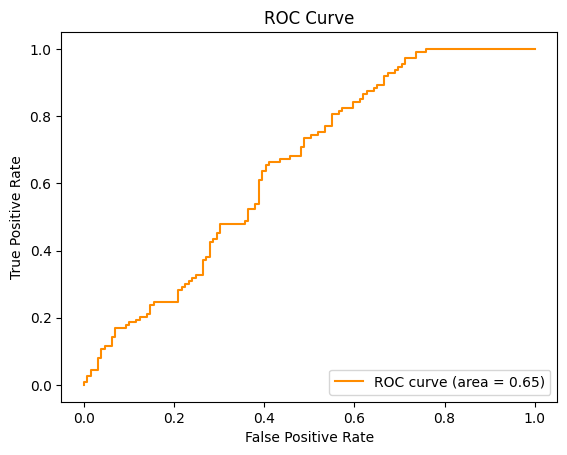

In [ ]:
# Assuming you have your test set y_test and predicted probabilities fraud_probabilities
# Convert probabilities to predicted class (0 or 1) using a threshold (default is 0.5)
threshold = 0.95
y_pred = (fraud_predictions > threshold).astype(int)

# Calculate metrics
accuracy = accuracy_score(Standardized_y_test, y_pred)
precision = precision_score(Standardized_y_test, y_pred)
recall = recall_score(Standardized_y_test, y_pred)
f1 = f1_score(Standardized_y_test, y_pred)
conf_matrix = confusion_matrix(Standardized_y_test, y_pred)
roc_auc = roc_auc_score(Standardized_y_test, fraud_predictions)
logloss = log_loss(Standardized_y_test, fraud_predictions)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"ROC AUC: {roc_auc}")
print(f"Log Loss: {logloss}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(Standardized_y_test, fraud_predictions)
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

###Normalization

In [ ]:
# # Define the parameter grid
# param_grid = {
#                       'n_estimators': [100, 200, 300], # The number of trees in the forest.
#                       'max_depth': [10, 20, None], # The maximum depth of the tree.
#                       'min_samples_split': [2, 5, 10], # The minimum number of samples required to split an internal node.
#                       'min_samples_leaf': [1, 2, 4], # The minimum number of samples required to be at a leaf node.
#                       'max_features': ['sqrt', 'log2', None] # The number of features to consider when looking for the best split.
#                       }
# # Initialize the Random Forest Classifier
# RF_classifier_Normalization = RandomForestClassifier(random_state=42)

# # Initialize GridSearchCV
# Normalized_grid_search = GridSearchCV(
#                                                           estimator=RF_classifier_Normalization,
#                                                           param_grid=param_grid,
#                                                           cv=5, # Number of folds in cross-validation
#                                                           n_jobs=-1, # Use all available cores
#                                                           verbose=2
#                                                           )

# # Train the classifier on the training data
# Normalized_grid_search.fit(Normalized_X_train, Normalized_y_train)

# #Get the cross-validation results dictionary
# cv_results = Normalized_grid_search.cv_results_

# # Access the mean test score for each hyperparameter combination
# mean_scores = cv_results['mean_test_score']

# # Access the standard deviation of the test score
# std_scores = cv_results['std_test_score']

# # Get individual fold scores
# fold_scores = [cv_results[f'split{i}_test_score'] for i in range(Normalized_grid_search.cv)]

# # Calculate the min and max scores across all folds for each parameter combination
# min_scores = mean_scores - std_scores
# max_scores = mean_scores + std_scores

# # Get the best parameters
# best_params = Normalized_grid_search.best_params_

# # Print the details
# print(f"Best parameters: {Normalized_grid_search.best_params_}")
# print(f"Best score: {Normalized_grid_search.best_score_}")
# print("Mean cross-validation scores: ", np.mean(mean_scores))
# print("Standard deviation of scores: ", np.mean(std_scores))
# print("Min scores: ", np.min(min_scores))
# print("Max scores: ", np.max(max_scores))

In [ ]:
#Define the parameter grid
RF_Normalized_Best_Parameters = {'max_depth': 10,
                                                    'max_features': 'sqrt',
                                                   'min_samples_leaf': 4,
                                                  'min_samples_split': 2,
                                                  'n_estimators': 200}

# Initialize the Random Forest Classifier
RF_classifier_Normalization = RandomForestClassifier(**RF_Normalized_Best_Parameters, random_state=42)

# Train the classifier on the training data
RF_classifier_Normalization.fit(Normalized_X_train, Normalized_y_train)

# Get predicted probabilities for the test set
Predictions = RF_classifier_Normalization.predict_proba(Normalized_X_test)

# The probabilities are in the format [probability_class_0, probability_class_1]
# We are typically interested in the probability of class 1 (e.g., fraud)
fraud_predictions = Predictions[:, 1]

# Output the probabilities
fraud_predictions

array([0.57965045, 0.50340597, 0.49525817, 0.51075481, 0.52715262,
       0.01131944, 0.69731303, 0.01021825, 0.71563911, 0.47976184,
       0.68563195, 0.01306577, 0.57477477, 0.03490817, 0.57024773,
       0.01346795, 0.64526373, 0.71676926, 0.00630357, 0.50430986,
       0.01942125, 0.56536058, 0.63485345, 0.50846352, 0.4960443 ,
       0.63364732, 0.62836711, 0.70109361, 0.48697505, 0.54609989,
       0.53351674, 0.71512368, 0.32288281, 0.70514778, 0.651841  ,
       0.69834018, 0.54463876, 0.0278936 , 0.62398326, 0.56272182,
       0.46220633, 0.50660607, 0.50032745, 0.60915251, 0.63134874,
       0.52399152, 0.50934104, 0.47772381, 0.02584043, 0.51477221,
       0.57869674, 0.50991024, 0.61732413, 0.61866988, 0.72474613,
       0.51464346, 0.6459877 , 0.46162753, 0.60090565, 0.48227734,
       0.48399429, 0.49883165, 0.50474679, 0.47923657, 0.49042389,
       0.67846607, 0.62009303, 0.57463313, 0.57670864, 0.02835646,
       0.56924883, 0.60904848, 0.7305939 , 0.57548888, 0.65916

Accuracy: 0.6033057851239669
Precision: 0.541871921182266
Recall: 0.9734513274336283
F1 Score: 0.6962025316455696
Confusion Matrix:
[[ 36  93]
 [  3 110]]
ROC AUC: 0.65178020168759
Log Loss: 0.6141237781619759


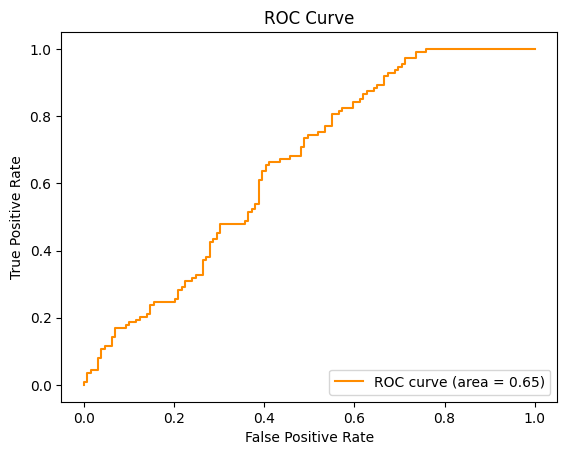

In [ ]:
# Assuming you have your test set y_test and predicted probabilities fraud_probabilities
# Convert probabilities to predicted class (0 or 1) using a threshold (default is 0.5)
threshold = 0.4
y_pred = (fraud_predictions > threshold).astype(int)

# Calculate metrics
accuracy = accuracy_score(Normalized_y_test, y_pred)
precision = precision_score(Normalized_y_test, y_pred)
recall = recall_score(Normalized_y_test, y_pred)
f1 = f1_score(Normalized_y_test, y_pred)
conf_matrix = confusion_matrix(Normalized_y_test, y_pred)
roc_auc = roc_auc_score(Normalized_y_test, fraud_predictions)
logloss = log_loss(Normalized_y_test, fraud_predictions)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"ROC AUC: {roc_auc}")
print(f"Log Loss: {logloss}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(Normalized_y_test, fraud_predictions)
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

##Gradient Boosting Classifier (GBM)

###Standardization

In [ ]:
# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300], # The number of boosting stages to be run.
#     'learning_rate': [0.01, 0.1, 0.2], # Learning rate shrinks the contribution of each tree by `learning_rate`.
#     'max_depth': [3, 5, 7], # Maximum depth of the individual regression estimators.
#     'min_samples_split': [2, 5, 10], # The minimum number of samples required to split an internal node.
#     'min_samples_leaf': [1, 2, 4], # The minimum number of samples required to be at a leaf node.
#     'subsample': [0.8, 0.9, 1.0], # The fraction of samples to be used for fitting the individual base learners.
#     'max_features': ['sqrt', 'log2', None] # The number of features to consider when looking for the best split.
# }

# # Initialize the Gradient Boosting Machine
# gbm_classifier_Standardization =GradientBoostingClassifier(random_state=42)

# # Initialize GridSearchCV
# Standardized_grid_search = GridSearchCV(estimator=gbm_classifier_Standardization, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# # Train the classifier on the training data
# Standardized_grid_search.fit(Standardized_X_train, Standardized_y_train)

# #Get the cross-validation results dictionary
# cv_results = Standardized_grid_search.cv_results_

# # Access the mean test score for each hyperparameter combination
# mean_scores = cv_results['mean_test_score']

# # Access the standard deviation of the test score
# std_scores = cv_results['std_test_score']

# # Get individual fold scores
# fold_scores = [cv_results[f'split{i}_test_score'] for i in range(Standardized_grid_search.cv)]

# # Calculate the min and max scores across all folds for each parameter combination
# min_scores = mean_scores - std_scores
# max_scores = mean_scores + std_scores

# # Get the best parameters
# best_params = Standardized_grid_search.best_params_

# # Print the details
# print(f"Best parameters: {Standardized_grid_search.best_params_}")
# print(f"Best score: {Standardized_grid_search.best_score_}")
# print("Mean cross-validation scores: ", np.mean(mean_scores))
# print("Standard deviation of scores: ", np.mean(std_scores))
# print("Min scores: ", np.min(min_scores))
# print("Max scores: ", np.max(max_scores))

In [ ]:
#Best Parameter From GridSearch Above
GBM_Standardized_Best_Parameters = {'learning_rate': 0.01,
                                    'max_depth': 3,
                                    'max_features': 'sqrt',
                                    'min_samples_leaf': 2,
                                    'min_samples_split': 2,
                                    'n_estimators': 100,
                                    'subsample': 1.0}

# Initialize the Gradient Boosting Classifier
GBM_classifier_Standardization = GradientBoostingClassifier(**GBM_Standardized_Best_Parameters, random_state=42)

# Train the classifier on the training data
GBM_classifier_Standardization.fit(Standardized_X_train, Standardized_y_train)

# Get predicted probabilities for the test set
Predictions = GBM_classifier_Standardization.predict_proba(Standardized_X_test)

# The probabilities are in the format [probability_class_0, probability_class_1]
# We are typically interested in the probability of class 1 (e.g., fraud)
fraud_predictions = Predictions[:, 1]

# Output the probabilities
fraud_predictions

array([0.56128506, 0.52983248, 0.52627554, 0.51087991, 0.57914382,
       0.22375096, 0.58104925, 0.22373509, 0.57313796, 0.54066781,
       0.56403486, 0.22375088, 0.54123673, 0.23047636, 0.52938918,
       0.22411686, 0.52072157, 0.58340958, 0.22385725, 0.55307255,
       0.22411686, 0.57676105, 0.57461415, 0.56868085, 0.54116591,
       0.58127192, 0.53970882, 0.5605568 , 0.54811953, 0.50883315,
       0.5396521 , 0.56604252, 0.5340395 , 0.53996719, 0.57997098,
       0.52869926, 0.52937625, 0.23047636, 0.55418662, 0.55614103,
       0.52481453, 0.5383813 , 0.50370681, 0.57997098, 0.54613944,
       0.53849999, 0.53884524, 0.50539086, 0.22496235, 0.53806605,
       0.56373915, 0.49926677, 0.56197207, 0.56044899, 0.52987792,
       0.51542862, 0.58340958, 0.50138152, 0.5502955 , 0.48697766,
       0.56620065, 0.52726828, 0.56787489, 0.53935513, 0.5393937 ,
       0.52887649, 0.53763949, 0.57284261, 0.56044899, 0.22421412,
       0.54199435, 0.57201177, 0.58358965, 0.53336468, 0.58358

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5330578512396694
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[129   0]
 [113   0]]
ROC AUC: 0.6668038691088702
Log Loss: 0.6340037008051754


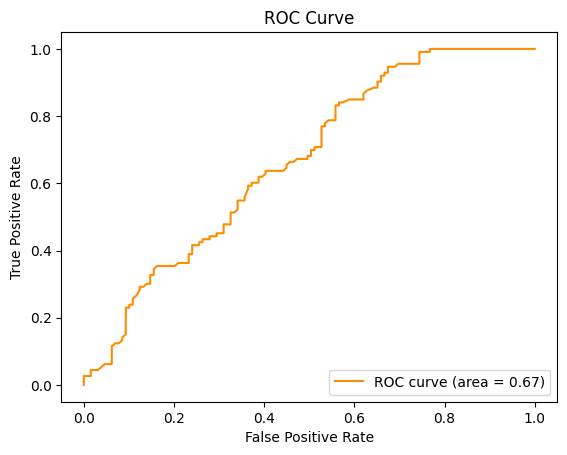

In [ ]:
# Assuming you have your test set y_test and predicted probabilities fraud_probabilities
# Convert probabilities to predicted class (0 or 1) using a threshold (default is 0.5)
threshold = 0.95
y_pred = (fraud_predictions > threshold).astype(int)

# Calculate metrics
accuracy = accuracy_score(Standardized_y_test, y_pred)
precision = precision_score(Standardized_y_test, y_pred)
recall = recall_score(Standardized_y_test, y_pred)
f1 = f1_score(Standardized_y_test, y_pred)
conf_matrix = confusion_matrix(Standardized_y_test, y_pred)
roc_auc = roc_auc_score(Standardized_y_test, fraud_predictions)
logloss = log_loss(Standardized_y_test, fraud_predictions)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"ROC AUC: {roc_auc}")
print(f"Log Loss: {logloss}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(Standardized_y_test, fraud_predictions)
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

###Normalization

In [ ]:
# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300], # The number of boosting stages to be run.
#     'learning_rate': [0.01, 0.1, 0.2], # Learning rate shrinks the contribution of each tree by `learning_rate`.
#     'max_depth': [3, 5, 7], # Maximum depth of the individual regression estimators.
#     'min_samples_split': [2, 5, 10], # The minimum number of samples required to split an internal node.
#     'min_samples_leaf': [1, 2, 4], # The minimum number of samples required to be at a leaf node.
#     'subsample': [0.8, 0.9, 1.0], # The fraction of samples to be used for fitting the individual base learners.
#     'max_features': ['sqrt', 'log2', None] # The number of features to consider when looking for the best split.
# }

# # Initialize the Gradient Boosting Machine
# gbm_classifier_Normalization =GradientBoostingClassifier(random_state=42)

# # Initialize GridSearchCV
# Normalization_grid_search = GridSearchCV(estimator=gbm_classifier_Normalization, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# # Train the classifier on the training data
# Normalization_grid_search.fit(Standardized_X_train, Standardized_y_train)

# #Get the cross-validation results dictionary
# cv_results = Normalization_grid_search.cv_results_

# # Access the mean test score for each hyperparameter combination
# mean_scores = cv_results['mean_test_score']

# # Access the standard deviation of the test score
# std_scores = cv_results['std_test_score']

# # Get individual fold scores
# fold_scores = [cv_results[f'split{i}_test_score'] for i in range(Normalization_grid_search.cv)]

# # Calculate the min and max scores across all folds for each parameter combination
# min_scores = mean_scores - std_scores
# max_scores = mean_scores + std_scores

# # Get the best parameters
# best_params = Normalization_grid_search.best_params_

# # Print the details
# print(f"Best parameters: {Normalization_grid_search.best_params_}")
# print(f"Best score: {Normalization_grid_search.best_score_}")
# print("Mean cross-validation scores: ", np.mean(mean_scores))
# print("Standard deviation of scores: ", np.mean(std_scores))
# print("Min scores: ", np.min(min_scores))
# print("Max scores: ", np.max(max_scores))

In [ ]:
#Best Parameter From GridSearch Above
GBM_Normalized_Best_Parameters = {'learning_rate': 0.01,
                                    'max_depth': 3,
                                    'max_features': 'sqrt',
                                    'min_samples_leaf': 2,
                                    'min_samples_split': 2,
                                    'n_estimators': 100,
                                    'subsample': 1.0}

# Initialize the Gradient Boosting Classifier
GBM_classifier_Normalization = GradientBoostingClassifier(**GBM_Normalized_Best_Parameters, random_state=42)

# Train the classifier on the training data
GBM_classifier_Normalization.fit(Normalized_X_train, Normalized_y_train)

# Get predicted probabilities for the test set
Predictions = GBM_classifier_Normalization.predict_proba(Normalized_X_test)

# The probabilities are in the format [probability_class_0, probability_class_1]
# We are typically interested in the probability of class 1 (e.g., fraud)
fraud_predictions = Predictions[:, 1]

# Output the probabilities
fraud_predictions

array([0.56128506, 0.52983248, 0.52627554, 0.51087991, 0.57914382,
       0.22375096, 0.58104925, 0.22373509, 0.57313796, 0.54066781,
       0.56403486, 0.22375088, 0.54123673, 0.23047636, 0.52938918,
       0.22411686, 0.52072157, 0.58340958, 0.22385725, 0.55307255,
       0.22411686, 0.57676105, 0.57461415, 0.56868085, 0.54116591,
       0.58127192, 0.53970882, 0.5605568 , 0.54811953, 0.50883315,
       0.5396521 , 0.56604252, 0.5340395 , 0.53996719, 0.57997098,
       0.52869926, 0.52937625, 0.23047636, 0.55418662, 0.55614103,
       0.52481453, 0.5383813 , 0.50370681, 0.57997098, 0.54613944,
       0.53849999, 0.53884524, 0.50539086, 0.22496235, 0.53806605,
       0.56373915, 0.49926677, 0.56197207, 0.56044899, 0.52987792,
       0.51542862, 0.58340958, 0.50138152, 0.5502955 , 0.48697766,
       0.56620065, 0.52726828, 0.56787489, 0.53935513, 0.5393937 ,
       0.52887649, 0.53763949, 0.57284261, 0.56044899, 0.22421412,
       0.54199435, 0.57201177, 0.58358965, 0.53336468, 0.58358

Accuracy: 0.5909090909090909
Precision: 0.5330188679245284
Recall: 1.0
F1 Score: 0.6953846153846154
Confusion Matrix:
[[ 30  99]
 [  0 113]]
ROC AUC: 0.6668038691088702
Log Loss: 0.6340037008051754


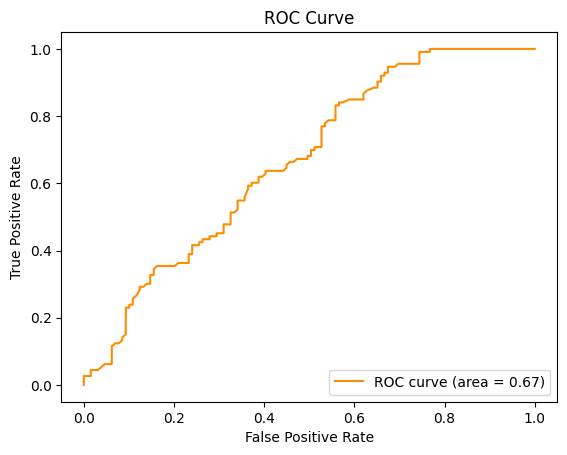

In [ ]:
# Assuming you have your test set y_test and predicted probabilities fraud_probabilities
# Convert probabilities to predicted class (0 or 1) using a threshold (default is 0.5)
threshold = 0.45
y_pred = (fraud_predictions > threshold).astype(int)

# Calculate metrics
accuracy = accuracy_score(Normalized_y_test, y_pred)
precision = precision_score(Normalized_y_test, y_pred)
recall = recall_score(Normalized_y_test, y_pred)
f1 = f1_score(Normalized_y_test, y_pred)
conf_matrix = confusion_matrix(Normalized_y_test, y_pred)
roc_auc = roc_auc_score(Normalized_y_test, fraud_predictions)
logloss = log_loss(Normalized_y_test, fraud_predictions)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"ROC AUC: {roc_auc}")
print(f"Log Loss: {logloss}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(Normalized_y_test, fraud_predictions)
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

##Logistic Regression

###Standardization

In [ ]:
# # Define the parameter grid for logistic regression
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
#     'penalty': ['l1', 'l2'],  # Penalties to use ('l1' for Lasso and 'l2' for Ridge)
#     'solver': ['liblinear', 'saga'],  # Algorithm to use in the optimization problem
#     'max_iter': [100, 200, 300]  # Maximum number of iterations taken for the solvers to converge
# }

# # Initialize the Logistic Regression classifier
# logistic_classifier_Standardization = LogisticRegression(random_state=42)

# # Initialize GridSearchCV
# Standardized_grid_search = GridSearchCV(estimator=logistic_classifier_Standardization, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# # Assuming you have already prepared your standardized training data: Standardized_X_train, Standardized_y_train
# # Train the classifier on the training data
# Standardized_grid_search.fit(Standardized_X_train, Standardized_y_train)

# # Get the cross-validation results dictionary
# cv_results = Standardized_grid_search.cv_results_

# # Access the mean test score for each hyperparameter combination
# mean_scores = cv_results['mean_test_score']

# # Access the standard deviation of the test score
# std_scores = cv_results['std_test_score']

# # Calculate the min and max scores across all folds for each parameter combination
# min_scores = mean_scores - std_scores
# max_scores = mean_scores + std_scores

# # Get the best parameters
# best_params = Standardized_grid_search.best_params_

# # Print the details
# print(f"Best parameters: {Standardized_grid_search.best_params_}")
# print(f"Best score: {Standardized_grid_search.best_score_}")
# print("Mean cross-validation scores: ", np.mean(mean_scores))
# print("Standard deviation of scores: ", np.mean(std_scores))
# print("Min scores: ", np.min(min_scores))
# print("Max scores: ", np.max(max_scores))

In [ ]:
# Best Parameters From Logistic Regression (Adjust these based on your GridSearch results)
# Note: The parameters here are placeholders. Replace them with your actual best parameters.
logistic_Standardized_Best_Parameters = {
    'C': 0.001,  # Regularization strength
    'penalty': 'l2',  # Penalty (l1 for Lasso, l2 for Ridge)
    'solver': 'liblinear',  # Solver
    'max_iter': 100  # Maximum number of iterations for convergence
}

# Initialize the Logistic Regression Classifier
logistic_classifier_Standardization = LogisticRegression(**logistic_Standardized_Best_Parameters, random_state=42)

# Assuming you have already prepared your standardized training and test data:
# Standardized_X_train, Standardized_y_train, Standardized_X_test
# Train the classifier on the training data
logistic_classifier_Standardization.fit(Standardized_X_train, Standardized_y_train)

# Get predicted probabilities for the test set
Predictions = logistic_classifier_Standardization.predict_proba(Standardized_X_test)

# The probabilities are in the format [probability_class_0, probability_class_1]
# We are typically interested in the probability of class 1 (e.g., fraud)
fraud_predictions = Predictions[:, 1]

# Output the probabilities
print(fraud_predictions)

[0.49387807 0.52770759 0.52123746 0.49777061 0.54013182 0.44584272
 0.52669031 0.46301825 0.50408174 0.51317603 0.55080306 0.45729666
 0.50199814 0.47560975 0.50406514 0.44808062 0.49004805 0.53161485
 0.45239885 0.5052377  0.442685   0.52898332 0.50357025 0.51669653
 0.5309429  0.51146486 0.49854386 0.53502705 0.49386876 0.47831565
 0.54286254 0.53162478 0.52228878 0.53426633 0.52903181 0.49676804
 0.49770847 0.47189718 0.50769705 0.52076951 0.51773381 0.51214211
 0.47720426 0.54247236 0.50547877 0.51477652 0.4859682  0.46845258
 0.43225163 0.51392683 0.55025056 0.46658157 0.54666467 0.50181278
 0.49530848 0.48125603 0.55468469 0.45814423 0.51661212 0.47855323
 0.5344005  0.5058717  0.53530488 0.52769617 0.48641059 0.48771825
 0.51476637 0.54670555 0.50340475 0.47277428 0.49351424 0.56043564
 0.55090578 0.48830863 0.57097041 0.53657369 0.51960125 0.49630629
 0.53066851 0.5257024  0.50342872 0.5230129  0.51589244 0.46925288
 0.52651381 0.48881008 0.52986443 0.49141316 0.54672406 0.4844

Accuracy: 0.5330578512396694
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[129   0]
 [113   0]]
ROC AUC: 0.6469095149893669
Log Loss: 0.6805318334272956


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


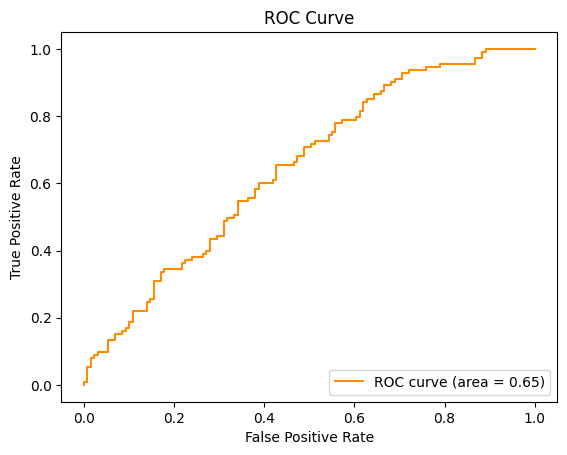

In [ ]:
# Assuming you have your test set y_test and predicted probabilities fraud_probabilities
# Convert probabilities to predicted class (0 or 1) using a threshold (default is 0.5)
threshold = 0.95
y_pred = (fraud_predictions > threshold).astype(int)

# Calculate metrics
accuracy = accuracy_score(Standardized_y_test, y_pred)
precision = precision_score(Standardized_y_test, y_pred)
recall = recall_score(Standardized_y_test, y_pred)
f1 = f1_score(Standardized_y_test, y_pred)
conf_matrix = confusion_matrix(Standardized_y_test, y_pred)
roc_auc = roc_auc_score(Standardized_y_test, fraud_predictions)
logloss = log_loss(Standardized_y_test, fraud_predictions)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"ROC AUC: {roc_auc}")
print(f"Log Loss: {logloss}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(Standardized_y_test, fraud_predictions)
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

###Normalization

In [ ]:
# Define the parameter grid for logistic regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Penalties to use ('l1' for Lasso and 'l2' for Ridge)
    'solver': ['liblinear', 'saga'],  # Algorithm to use in the optimization problem
    'max_iter': [100, 200, 300]  # Maximum number of iterations taken for the solvers to converge
}

# Initialize the Logistic Regression classifier
logistic_classifier_Normalization = LogisticRegression(random_state=42)

# Initialize GridSearchCV
Normalized_grid_search = GridSearchCV(estimator=logistic_classifier_Normalization, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Assuming you have already prepared your standardized training data: Standardized_X_train, Standardized_y_train
# Train the classifier on the training data
Normalized_grid_search.fit(Normalized_X_train, Normalized_y_train)

# Get the cross-validation results dictionary
cv_results = Normalized_grid_search.cv_results_

# Access the mean test score for each hyperparameter combination
mean_scores = cv_results['mean_test_score']

# Access the standard deviation of the test score
std_scores = cv_results['std_test_score']

# Calculate the min and max scores across all folds for each parameter combination
min_scores = mean_scores - std_scores
max_scores = mean_scores + std_scores

# Get the best parameters
best_params = Normalized_grid_search.best_params_

# Print the details
print(f"Best parameters: {Normalized_grid_search.best_params_}")
print(f"Best score: {Normalized_grid_search.best_score_}")
print("Mean cross-validation scores: ", np.mean(mean_scores))
print("Standard deviation of scores: ", np.mean(std_scores))
print("Min scores: ", np.min(min_scores))
print("Max scores: ", np.max(max_scores))

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best score: 0.5962732919254659
Mean cross-validation scores:  0.5664682539682538
Standard deviation of scores:  0.019664199459991483
Min scores:  0.490254437306032
Max scores:  0.6297381402332416


In [ ]:
# Best Parameters From Logistic Regression (Adjust these based on your GridSearch results)
# Note: The parameters here are placeholders. Replace them with your actual best parameters.
logistic_Normalized_Best_Parameters = {
    'C': 0.1,  # Regularization strength
    'penalty': 'l2',  # Penalty (l1 for Lasso, l2 for Ridge)
    'solver': 'liblinear',  # Solver
    'max_iter': 100  # Maximum number of iterations for convergence
}

# Initialize the Logistic Regression Classifier
logistic_classifier_Normalization = LogisticRegression(**logistic_Normalized_Best_Parameters, random_state=42)

# Assuming you have already prepared your standardized training and test data:
# Standardized_X_train, Standardized_y_train, Standardized_X_test
# Train the classifier on the training data
logistic_classifier_Normalization.fit(Standardized_X_train, Standardized_y_train)

# Get predicted probabilities for the test set
Predictions = logistic_classifier_Normalization.predict_proba(Standardized_X_test)

# The probabilities are in the format [probability_class_0, probability_class_1]
# We are typically interested in the probability of class 1 (e.g., fraud)
fraud_predictions = Predictions[:, 1]

# Output the probabilities
print(fraud_predictions)

[0.41064235 0.62344473 0.60409874 0.47778078 0.63121683 0.25090777
 0.61013786 0.29919519 0.47797578 0.54416222 0.69938058 0.28340388
 0.49739482 0.32822485 0.53100314 0.26092376 0.45806468 0.60047868
 0.26445551 0.47554121 0.24111815 0.58507455 0.4700865  0.54370161
 0.63102325 0.50493672 0.47530632 0.63630943 0.43781904 0.3591182
 0.68405188 0.61623245 0.58813741 0.66843555 0.59057696 0.49039476
 0.49814284 0.31258316 0.45260273 0.56330523 0.57938155 0.56299302
 0.36627816 0.66208967 0.498955   0.54226862 0.43151235 0.3250929
 0.20926792 0.56830439 0.70437032 0.33536489 0.66866744 0.43093571
 0.48335741 0.38876725 0.70598019 0.31754579 0.54981865 0.34321446
 0.62736202 0.52548504 0.63741217 0.63577237 0.43141914 0.46187265
 0.52803859 0.68219865 0.43532475 0.31418289 0.45004961 0.7261049
 0.66810832 0.38686154 0.75261304 0.63139951 0.56407074 0.48740057
 0.61747071 0.58877794 0.51050614 0.55898165 0.57019942 0.29246496
 0.61177369 0.38916068 0.60600785 0.43467584 0.66838048 0.3839127

Accuracy: 0.628099173553719
Precision: 0.5696969696969697
Recall: 0.831858407079646
F1 Score: 0.6762589928057553
Confusion Matrix:
[[58 71]
 [19 94]]
ROC AUC: 0.6593949372298827
Log Loss: 0.6500254831577804


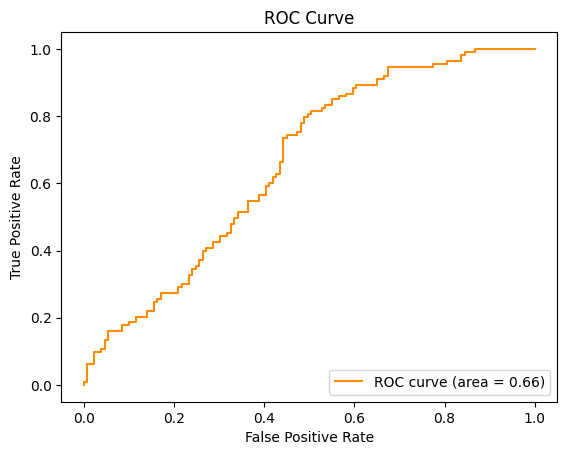

In [ ]:
# Assuming you have your test set y_test and predicted probabilities fraud_probabilities
# Convert probabilities to predicted class (0 or 1) using a threshold (default is 0.5)
threshold = 0.45
y_pred = (fraud_predictions > threshold).astype(int)

# Calculate metrics
accuracy = accuracy_score(Normalized_y_test, y_pred)
precision = precision_score(Normalized_y_test, y_pred)
recall = recall_score(Normalized_y_test, y_pred)
f1 = f1_score(Normalized_y_test, y_pred)
conf_matrix = confusion_matrix(Normalized_y_test, y_pred)
roc_auc = roc_auc_score(Normalized_y_test, fraud_predictions)
logloss = log_loss(Normalized_y_test, fraud_predictions)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"ROC AUC: {roc_auc}")
print(f"Log Loss: {logloss}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(Normalized_y_test, fraud_predictions)
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

##XG Boost

###Standardization

In [ ]:
# # Define the parameter grid for XGBoost
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Number of gradient boosted trees. Equivalent to number of boosting rounds.
#     'learning_rate': [0.01, 0.1, 0.2],  # Boosting learning rate (xgb’s “eta”)
#     'max_depth': [3, 5, 7],  # Maximum tree depth for base learners.
#     'min_child_weight': [1, 5, 10],  # Minimum sum of instance weight(hessian) needed in a child.
#     'gamma': [0.5, 1, 1.5, 2],  # Minimum loss reduction required to make a further partition on a leaf node.
#     'subsample': [0.6, 0.8, 1.0],  # Subsample ratio of the training instance.
#     'colsample_bytree': [0.6, 0.8, 1.0]  # Subsample ratio of columns when constructing each tree.
# }

# # Initialize the XGBoost Classifier
# xgb_classifier_Standardization = XGBClassifier(random_state=42)

# # Initialize GridSearchCV
# Standardized_grid_search = GridSearchCV(estimator=xgb_classifier_Standardization, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# # Assuming you have already prepared your standardized training data: Standardized_X_train, Standardized_y_train
# # Train the classifier on the training data
# Standardized_grid_search.fit(Standardized_X_train, Standardized_y_train)

# # Get the cross-validation results dictionary
# cv_results = Standardized_grid_search.cv_results_

# # Access the mean test score for each hyperparameter combination
# mean_scores = cv_results['mean_test_score']

# # Access the standard deviation of the test score
# std_scores = cv_results['std_test_score']

# # Calculate the min and max scores across all folds for each parameter combination
# min_scores = mean_scores - std_scores
# max_scores = mean_scores + std_scores

# # Get the best parameters
# best_params = Standardized_grid_search.best_params_

# # Print the details
# print(f"Best parameters: {Standardized_grid_search.best_params_}")
# print(f"Best score: {Standardized_grid_search.best_score_}")
# print("Mean cross-validation scores: ", np.mean(mean_scores))
# print("Standard deviation of scores: ", np.mean(std_scores))
# print("Min scores: ", np.min(min_scores))
# print("Max scores: ", np.max(max_scores))

In [ ]:
# Best Parameters From XGBoost (Adjust these based on your GridSearch results)
# Note: These parameters are placeholders. Replace them with your actual best parameters from XGBoost.
xgb_Standardized_Best_Parameters = {
    'n_estimators': 100,  # Number of gradient boosted trees. Equivalent to number of boosting rounds
    'learning_rate': 0.2,  # Boosting learning rate (xgb's "eta")
    'max_depth': 7,  # Maximum tree depth for base learners
    'min_child_weight': 10,  # Minimum sum of instance weight (hessian) needed in a child
    'gamma': 1.5,  # Minimum loss reduction required to make a further partition on a leaf node
    'subsample': 0.8,  # Subsample ratio of the training instance
    'colsample_bytree': 0.6  # Subsample ratio of columns when constructing each tree
}

# Initialize the XGBoost Classifier
xgb_classifier_Standardization = XGBClassifier(**xgb_Standardized_Best_Parameters, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Assuming you have already prepared your standardized training and test data:
# Standardized_X_train, Standardized_y_train, Standardized_X_test
# Train the classifier on the training data
xgb_classifier_Standardization.fit(Standardized_X_train, Standardized_y_train)

# Get predicted probabilities for the test set
Predictions = xgb_classifier_Standardization.predict_proba(Standardized_X_test)

# The probabilities are in the format [probability_class_0, probability_class_1]
# We are typically interested in the probability of class 1 (e.g., fraud)
fraud_predictions = Predictions[:, 1]

# Output the probabilities
print(fraud_predictions)

[0.5457405  0.48514336 0.49918148 0.501696   0.6503822  0.10653992
 0.66513246 0.10488044 0.72349674 0.5560514  0.62682265 0.10960183
 0.54661834 0.08464551 0.52925164 0.10788439 0.50197476 0.66394275
 0.08764035 0.5749599  0.09602617 0.6375454  0.6932489  0.60945207
 0.4234484  0.64227396 0.64849645 0.652349   0.4833455  0.4188077
 0.612202   0.5659711  0.5711734  0.639089   0.664044   0.61467415
 0.6178401  0.06987788 0.5577018  0.6364782  0.41229695 0.5782831
 0.4474876  0.6963743  0.64632845 0.5130585  0.70337594 0.41606072
 0.13004503 0.5452368  0.6135436  0.2940646  0.46415395 0.52619374
 0.6918938  0.3743651  0.6779429  0.41606832 0.54379976 0.43622762
 0.6620477  0.4984528  0.5681258  0.5610218  0.70166385 0.6675206
 0.5653161  0.5798951  0.5160143  0.07830899 0.56702346 0.6171824
 0.7306181  0.4966826  0.65746874 0.77627784 0.61905456 0.59972143
 0.55523115 0.61676776 0.3961563  0.47204724 0.57606333 0.08006582
 0.5373448  0.4966826  0.6029989  0.66456014 0.76620317 0.4779538


Accuracy: 0.5330578512396694
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[129   0]
 [113   0]]
ROC AUC: 0.6656719489606915
Log Loss: 0.6287723932200994


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


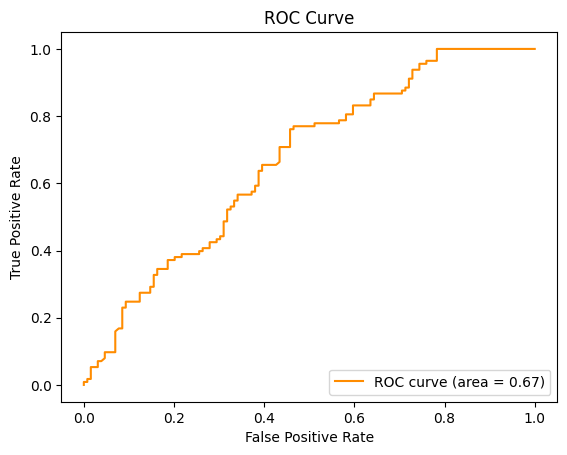

In [ ]:
# Assuming you have your test set y_test and predicted probabilities fraud_probabilities
# Convert probabilities to predicted class (0 or 1) using a threshold (default is 0.5)
threshold = 0.95
y_pred = (fraud_predictions > threshold).astype(int)

# Calculate metrics
accuracy = accuracy_score(Standardized_y_test, y_pred)
precision = precision_score(Standardized_y_test, y_pred)
recall = recall_score(Standardized_y_test, y_pred)
f1 = f1_score(Standardized_y_test, y_pred)
conf_matrix = confusion_matrix(Standardized_y_test, y_pred)
roc_auc = roc_auc_score(Standardized_y_test, fraud_predictions)
logloss = log_loss(Standardized_y_test, fraud_predictions)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"ROC AUC: {roc_auc}")
print(f"Log Loss: {logloss}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(Standardized_y_test, fraud_predictions)
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

###Normalization

In [ ]:
# # Define the parameter grid for XGBoost
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Number of gradient boosted trees. Equivalent to number of boosting rounds.
#     'learning_rate': [0.01, 0.1, 0.2],  # Boosting learning rate (xgb’s “eta”)
#     'max_depth': [3, 5, 7],  # Maximum tree depth for base learners.
#     'min_child_weight': [1, 5, 10],  # Minimum sum of instance weight(hessian) needed in a child.
#     'gamma': [0.5, 1, 1.5, 2],  # Minimum loss reduction required to make a further partition on a leaf node.
#     'subsample': [0.6, 0.8, 1.0],  # Subsample ratio of the training instance.
#     'colsample_bytree': [0.6, 0.8, 1.0]  # Subsample ratio of columns when constructing each tree.
# }

# # Initialize the XGBoost Classifier
# xgb_classifier_Normalization = XGBClassifier(random_state=42)

# # Initialize GridSearchCV
# Normalized_grid_search = GridSearchCV(estimator=xgb_classifier_Normalization, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# # Assuming you have already prepared your standardized training data: Standardized_X_train, Standardized_y_train
# # Train the classifier on the training data
# Normalized_grid_search.fit(Normalized_X_train, Normalized_y_train)

# # Get the cross-validation results dictionary
# cv_results = Normalized_grid_search.cv_results_

# # Access the mean test score for each hyperparameter combination
# mean_scores = cv_results['mean_test_score']

# # Access the standard deviation of the test score
# std_scores = cv_results['std_test_score']

# # Calculate the min and max scores across all folds for each parameter combination
# min_scores = mean_scores - std_scores
# max_scores = mean_scores + std_scores

# # Get the best parameters
# best_params = Standardized_grid_search.best_params_

# # Print the details
# print(f"Best parameters: {Normalized_grid_search.best_params_}")
# print(f"Best score: {Normalized_grid_search.best_score_}")
# print("Mean cross-validation scores: ", np.mean(mean_scores))
# print("Standard deviation of scores: ", np.mean(std_scores))
# print("Min scores: ", np.min(min_scores))
# print("Max scores: ", np.max(max_scores))

In [ ]:
# Best Parameters From XGBoost (Adjust these based on your GridSearch results)
# Note: These parameters are placeholders. Replace them with your actual best parameters from XGBoost.
xgb_Normalized_Best_Parameters = {
    'n_estimators': 100,  # Number of gradient boosted trees. Equivalent to number of boosting rounds
    'learning_rate': 0.2,  # Boosting learning rate (xgb's "eta")
    'max_depth': 7,  # Maximum tree depth for base learners
    'min_child_weight': 10,  # Minimum sum of instance weight (hessian) needed in a child
    'gamma': 1.5,  # Minimum loss reduction required to make a further partition on a leaf node
    'subsample': 0.8,  # Subsample ratio of the training instance
    'colsample_bytree': 0.6  # Subsample ratio of columns when constructing each tree
}

# Initialize the XGBoost Classifier
xgb_classifier_Normalization = XGBClassifier(**xgb_Normalized_Best_Parameters, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Assuming you have already prepared your standardized training and test data:
# Standardized_X_train, Standardized_y_train, Standardized_X_test
# Train the classifier on the training data
xgb_classifier_Normalization.fit(Normalized_X_train, Normalized_y_train)

# Get predicted probabilities for the test set
Predictions = xgb_classifier_Normalization.predict_proba(Normalized_X_test)

# The probabilities are in the format [probability_class_0, probability_class_1]
# We are typically interested in the probability of class 1 (e.g., fraud)
fraud_predictions = Predictions[:, 1]

# Output the probabilities
print(fraud_predictions)

[0.5457405  0.48514336 0.49918148 0.501696   0.6503822  0.10653992
 0.66513246 0.10488044 0.72349674 0.5560514  0.62682265 0.10960183
 0.54661834 0.08464551 0.52925164 0.10788439 0.50197476 0.66394275
 0.08764035 0.5749599  0.09602617 0.6375454  0.6932489  0.60945207
 0.4234484  0.64227396 0.64849645 0.652349   0.4833455  0.4188077
 0.612202   0.5659711  0.5711734  0.639089   0.664044   0.61467415
 0.6178401  0.06987788 0.5577018  0.6364782  0.41229695 0.5782831
 0.4474876  0.6963743  0.64632845 0.5130585  0.70337594 0.41606072
 0.13004503 0.5452368  0.6135436  0.2940646  0.46415395 0.52619374
 0.6918938  0.3743651  0.6779429  0.41606832 0.54379976 0.43622762
 0.6620477  0.4984528  0.5681258  0.5610218  0.70166385 0.6675206
 0.5653161  0.5798951  0.5160143  0.07830899 0.56702346 0.6171824
 0.7306181  0.4966826  0.65746874 0.77627784 0.61905456 0.59972143
 0.55523115 0.61676776 0.3961563  0.47204724 0.57606333 0.08006582
 0.5373448  0.4966826  0.6029989  0.66456014 0.76620317 0.4779538


Accuracy: 0.5909090909090909
Precision: 0.5384615384615384
Recall: 0.8672566371681416
F1 Score: 0.664406779661017
Confusion Matrix:
[[45 84]
 [15 98]]
ROC AUC: 0.6656719489606915
Log Loss: 0.6287723932200994


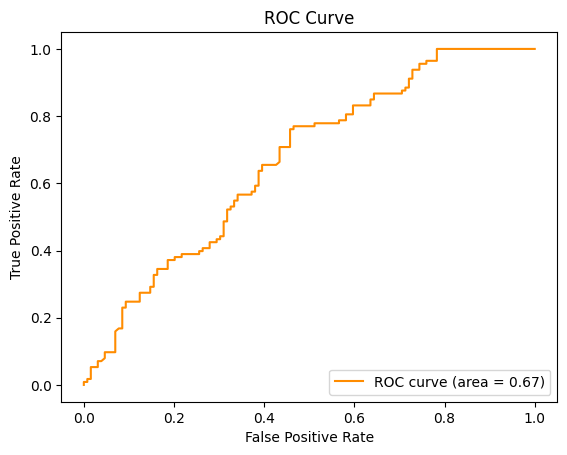

In [ ]:
# Assuming you have your test set y_test and predicted probabilities fraud_probabilities
# Convert probabilities to predicted class (0 or 1) using a threshold (default is 0.5)
threshold = 0.45
y_pred = (fraud_predictions > threshold).astype(int)

# Calculate metrics
accuracy = accuracy_score(Normalized_y_test, y_pred)
precision = precision_score(Normalized_y_test, y_pred)
recall = recall_score(Normalized_y_test, y_pred)
f1 = f1_score(Normalized_y_test, y_pred)
conf_matrix = confusion_matrix(Normalized_y_test, y_pred)
roc_auc = roc_auc_score(Normalized_y_test, fraud_predictions)
logloss = log_loss(Normalized_y_test, fraud_predictions)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"ROC AUC: {roc_auc}")
print(f"Log Loss: {logloss}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(Normalized_y_test, fraud_predictions)
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()